<a href="https://colab.research.google.com/github/anshika0601/pytorchz-learn/blob/main/Day14/BatchNorm%26DropOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data=datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
test_data=datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
test_loader=DataLoader(test_data,batch_size=64,shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




In [ ]:

import matplotlib.pyplot as plt

# ------------------------
# 1. Training Function
# ------------------------
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5, device="cuda"):
    model.to(device)
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(epochs):

        model.train()
        correct, total, running_loss = 0, 0, 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == targets).sum().item()
            total += targets.size(0)

        train_losses.append(running_loss/len(train_loader))
        train_accs.append(100 * correct/total)

        # ---- Validation ----
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == targets).sum().item()
                total += targets.size(0)

        val_losses.append(val_loss/len(val_loader))
        val_accs.append(100 * correct/total)

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.2f}% | "
              f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.2f}%")

    return train_losses, val_losses, train_accs, val_accs

# ------------------------
# 2. Plot Function
# ------------------------
def plot_curves(train_losses, val_losses, train_accs, val_accs, title="Model Performance"):
    epochs = range(1, len(train_losses)+1)
    plt.figure(figsize=(12,5))

    # Loss curve
    plt.subplot(1,2,1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{title} - Loss")
    plt.legend()

    # Accuracy curve
    plt.subplot(1,2,2)
    plt.plot(epochs, train_accs, label="Train Acc")
    plt.plot(epochs, val_accs, label="Val Acc")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.legend()

    plt.show()


Epoch [1/5] Train Loss: 1.3194, Train Acc: 52.53% | Val Loss: 1.0692, Val Acc: 61.96%
Epoch [2/5] Train Loss: 0.9420, Train Acc: 66.74% | Val Loss: 0.9085, Val Acc: 68.19%
Epoch [3/5] Train Loss: 0.7879, Train Acc: 72.44% | Val Loss: 0.8738, Val Acc: 69.62%
Epoch [4/5] Train Loss: 0.6692, Train Acc: 76.64% | Val Loss: 0.8234, Val Acc: 71.88%
Epoch [5/5] Train Loss: 0.5689, Train Acc: 80.07% | Val Loss: 0.8178, Val Acc: 72.59%


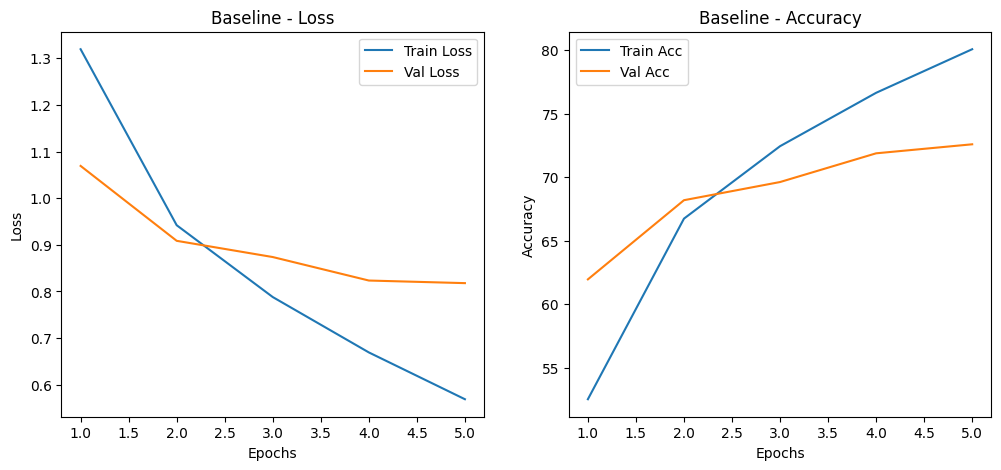

Epoch [1/5] Train Loss: 1.1083, Train Acc: 60.80% | Val Loss: 0.9568, Val Acc: 66.45%
Epoch [2/5] Train Loss: 0.7884, Train Acc: 72.29% | Val Loss: 0.8609, Val Acc: 70.02%
Epoch [3/5] Train Loss: 0.6314, Train Acc: 78.07% | Val Loss: 0.7849, Val Acc: 73.32%
Epoch [4/5] Train Loss: 0.5094, Train Acc: 82.45% | Val Loss: 0.7710, Val Acc: 74.20%
Epoch [5/5] Train Loss: 0.4007, Train Acc: 86.20% | Val Loss: 0.7938, Val Acc: 74.05%


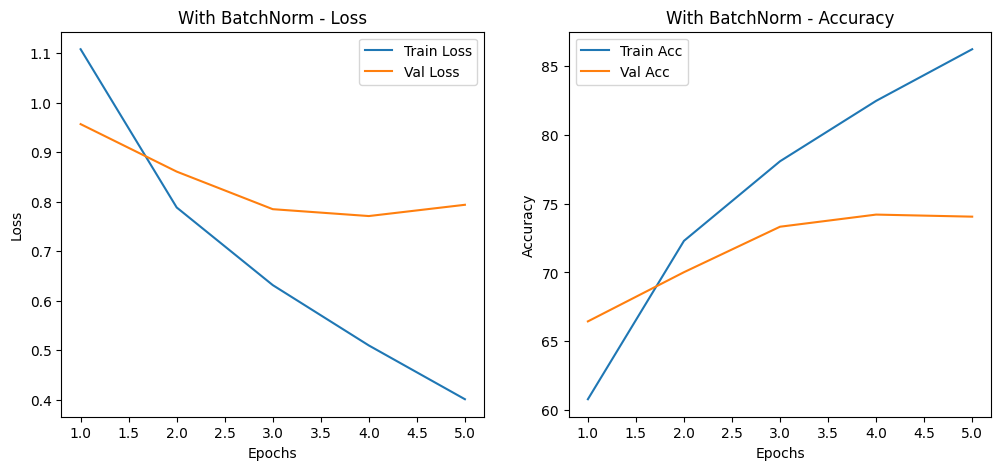

Epoch [1/5] Train Loss: 1.3062, Train Acc: 53.63% | Val Loss: 1.2658, Val Acc: 55.94%
Epoch [2/5] Train Loss: 1.0273, Train Acc: 63.82% | Val Loss: 1.1474, Val Acc: 59.94%
Epoch [3/5] Train Loss: 0.9327, Train Acc: 67.23% | Val Loss: 1.0215, Val Acc: 63.93%
Epoch [4/5] Train Loss: 0.8563, Train Acc: 69.91% | Val Loss: 1.0058, Val Acc: 63.82%
Epoch [5/5] Train Loss: 0.8092, Train Acc: 71.63% | Val Loss: 0.8800, Val Acc: 68.79%


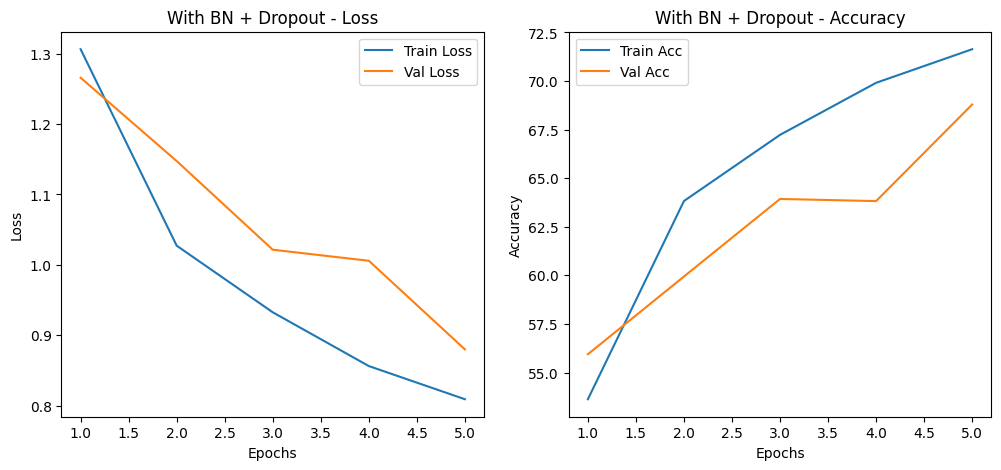

In [ ]:
import torch.optim as optim

# --------------------
# 1. Baseline Model
# --------------------
baseline_model = SimpleNet().to(device)
optimizer = optim.Adam(baseline_model.parameters(), lr=0.001)
bl_train_losses, bl_val_losses, bl_train_accs, bl_val_accs = train_model(
    baseline_model, train_loader, test_loader, criterion, optimizer, epochs=5, device=device
)
plot_curves(bl_train_losses, bl_val_losses, bl_train_accs, bl_val_accs, title="Baseline")

# --------------------
# 2. BatchNorm Only
# --------------------
bn_model = SimpleBNNet().to(device)
optimizer = optim.Adam(bn_model.parameters(), lr=0.001)
bn_train_losses, bn_val_losses, bn_train_accs, bn_val_accs = train_model(
    bn_model, train_loader, test_loader, criterion, optimizer, epochs=5, device=device
)
plot_curves(bn_train_losses, bn_val_losses, bn_train_accs, bn_val_accs, title="With BatchNorm")

# --------------------
# 3. BatchNorm + Dropout
# --------------------
bn_drop_model = SimpleBNDRNet().to(device)
optimizer = optim.Adam(bn_drop_model.parameters(), lr=0.001)
bnd_train_losses, bnd_val_losses, bnd_train_accs, bnd_val_accs = train_model(
    bn_drop_model, train_loader, test_loader, criterion, optimizer, epochs=5, device=device
)
plot_curves(bnd_train_losses, bnd_val_losses, bnd_train_accs, bnd_val_accs, title="With BN + Dropout")

In [ ]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),
            nn.Linear(64*8*8, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.layers(x)

class SimpleBNNet(nn.Module):
    def __init__(self):
        super(SimpleBNNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Flatten(),
            nn.Linear(64*8*8, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.layers(x)

class SimpleBNDRNet(nn.Module):
    def __init__(self):
        super(SimpleBNDRNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.MaxPool2d(2),

            nn.Flatten(),
            nn.Linear(64*8*8, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.layers(x)